In [1]:
# This is the code of data dating_app_behavior_dataset_extended1.csv.
# This report has a research question: Can machine learning models predict the outcome of user interactions on dating apps based on demographic and behavioral data?
# Firstly, we import all the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Load the dataset ---
# Since the CSV file is in the same folder, we just provide the filename.
path = Path("dating_app_behavior_dataset_extended1.csv")
df = pd.read_csv(path)

# --- Show a quick preview of the dataset ---
# head(10): display the first 10 rows for inspection
# shape: shows the number of rows and columns (dimensions)
print(df.head(10))
print("Dataset dimension:", df.shape)


              gender sexual_orientation location_type income_bracket  \
0  Prefer Not to Say                Gay         Urban           High   
1               Male           Bisexual      Suburban   Upper-Middle   
2         Non-binary          Pansexual      Suburban            Low   
3        Genderfluid                Gay         Metro       Very Low   
4               Male           Bisexual         Urban         Middle   
5        Genderfluid            Lesbian    Small Town           High   
6               Male            Asexual         Metro   Lower-Middle   
7             Female           Bisexual   Remote Area   Upper-Middle   
8               Male                Gay      Suburban           High   
9  Prefer Not to Say                Gay   Remote Area   Upper-Middle   

       education_level                              interest_tags  \
0           Bachelor’s               Fitness, Politics, Traveling   
1  No Formal Education              Languages, Fashion, Parenting   


In [2]:
import pandas as pd
from IPython.display import display  

path = "dating_app_behavior_dataset_extended1.csv"
df = pd.read_csv(path)
display(df.head(10))


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,...,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,age,height_cm,weight_kg,zodiac_sign,body_type,relationship_intent
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,...,0.36,13,Early Morning,Mutual Match,56,149,40.6,Taurus,Curvy,Friends Only
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,...,0.42,0,Morning,Chat Ignored,40,155,69.7,Leo,Plus Size,Hookups
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,...,0.41,1,After Midnight,Date Happened,30,185,96.9,Sagittarius,Curvy,Serious Relationship
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,...,0.07,21,Morning,No Action,57,154,49.3,Taurus,Slim,Exploring
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,...,0.11,22,After Midnight,One-sided Like,24,149,40.0,Libra,Slim,Casual Dating
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,...,0.18,10,Early Morning,Blocked,39,167,53.3,Virgo,Curvy,Exploring
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,...,0.32,14,Morning,No Action,44,168,81.3,Capricorn,Slim,Serious Relationship
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,...,0.54,16,Evening,One-sided Like,59,159,67.8,Capricorn,Muscular,Hookups
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,...,0.27,8,Late Night,Mutual Match,26,160,65.0,Taurus,Plus Size,Exploring
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,...,0.27,23,Afternoon,Relationship Formed,24,151,55.6,Gemini,Athletic,Friends Only


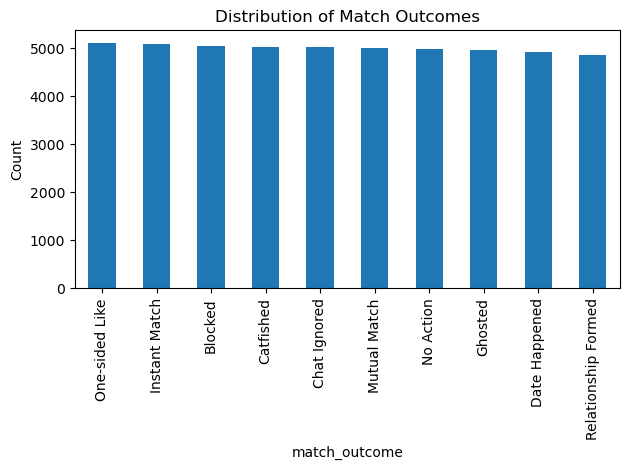

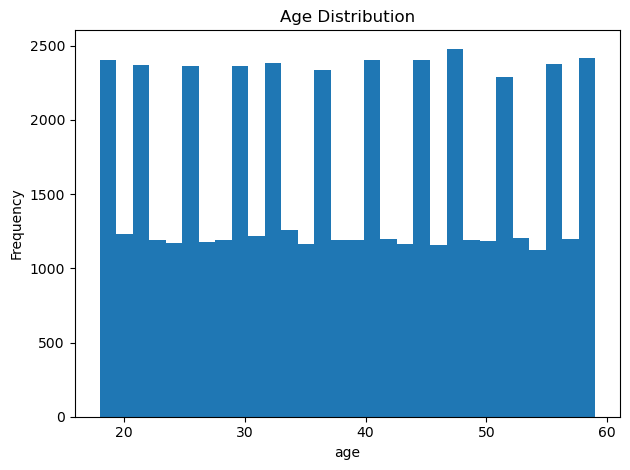

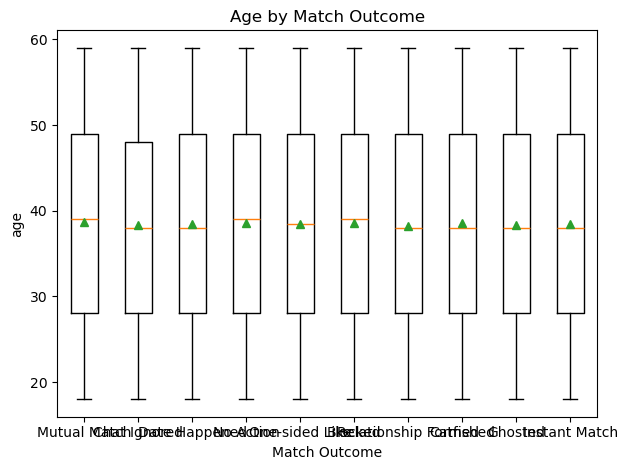

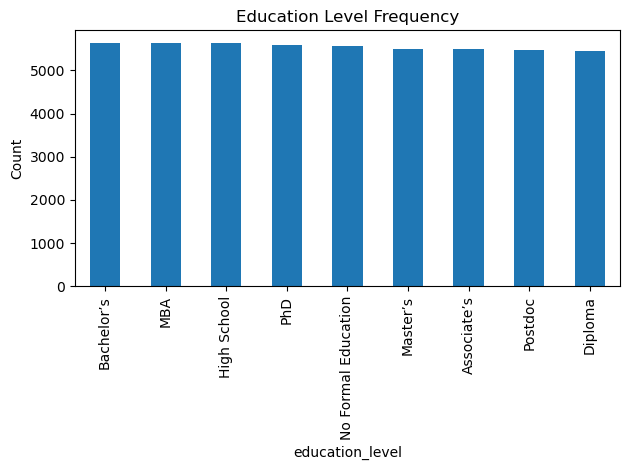

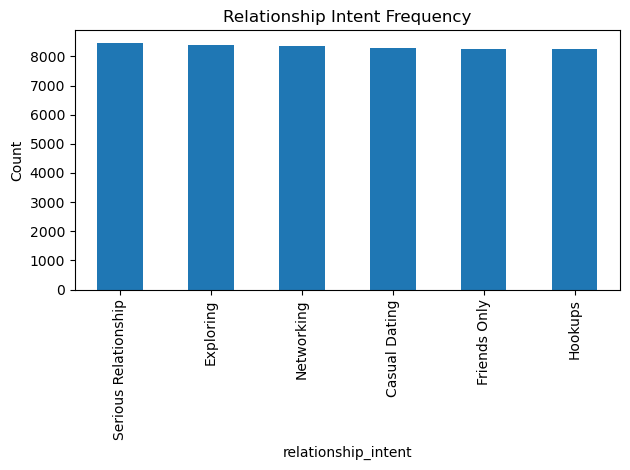

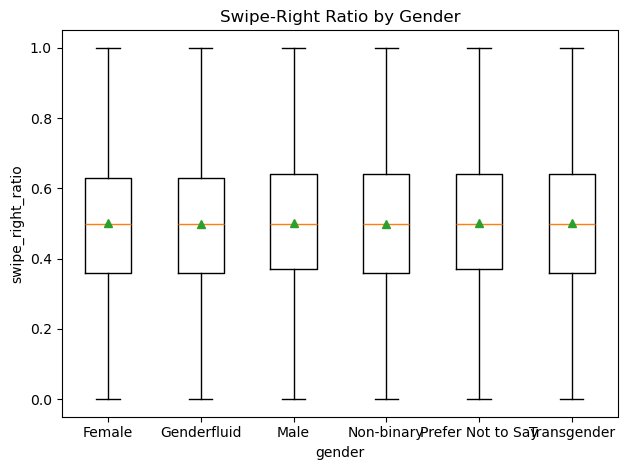

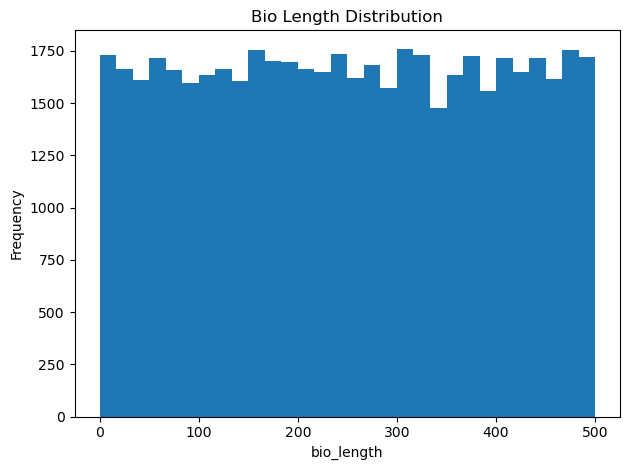

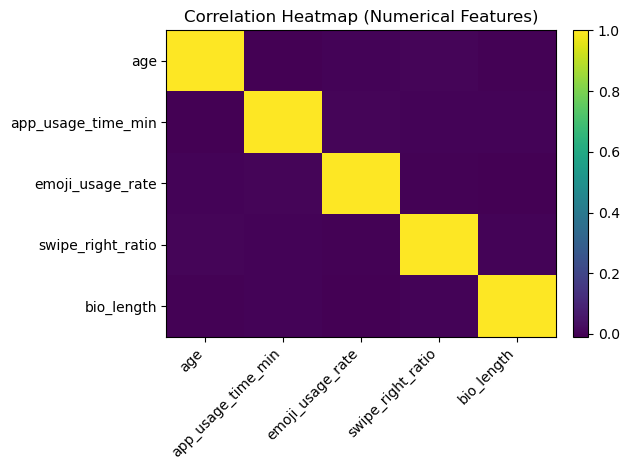

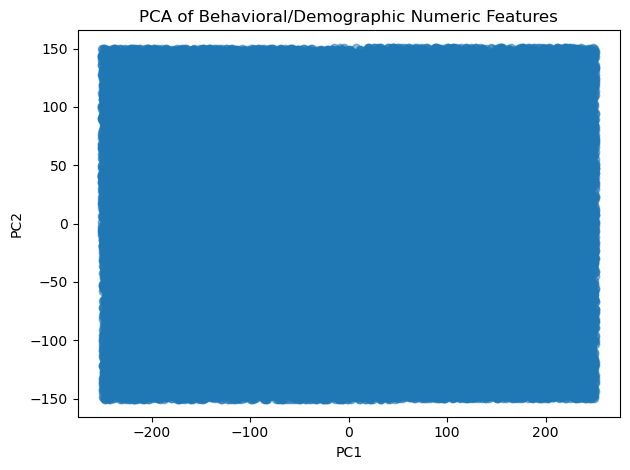

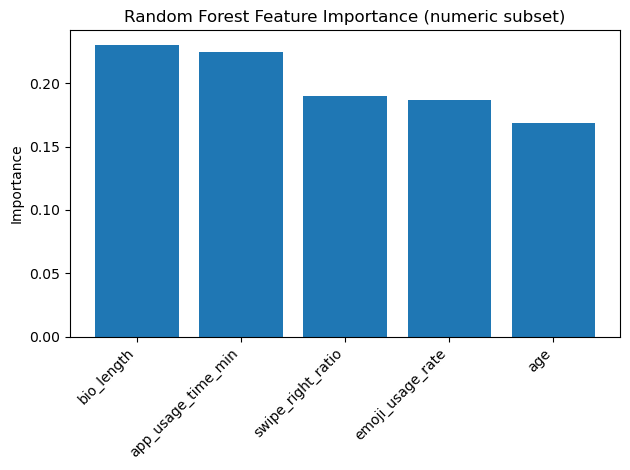

All figures saved to: /mnt/data/eda_figures
Files:
01_target_distribution_bar.png
02_age_hist.png
03_age_by_outcome_box.png
04_education_bar.png
05_intent_bar.png
06_swipe_ratio_by_gender_box.png
08_bio_length_hist.png
09_corr_heatmap.png
10_pca_scatter.png
11_rf_feature_importance.png


In [3]:
# Then, we perform data visualization, for which we use matplotlib.
# This script loads the dataset and generates a set of EDA plots that match the plan we discussed.
import os
import textwrap
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 1) Load data:
csv_path = "dating_app_behavior_dataset_extended1.csv"
assert os.path.exists(csv_path), f"CSV not found at {csv_path}"
df = pd.read_csv(csv_path)
df.head(200)
# 2) Helper utilities:
def find_column(candidates):
    """Return the first existing column from a list of candidate names (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    # fuzzy: try substring match
    cand_low = [c.lower() for c in candidates]
    for col in df.columns:
        for c in cand_low:
            if c in col.lower():
                return col
    return None
def safe_numeric(series):
    """Coerce a series to numeric where possible."""
    return pd.to_numeric(series, errors="coerce")
def title_wrap(ax, title, width=70):
    ax.set_title("\n".join(textwrap.wrap(title, width=width)))
# 3) Pick likely columns:
col_age = find_column(["age"])
col_gender = find_column(["gender", "sex"])
col_education = find_column(["education", "edu_level"])
col_income = find_column(["income", "annual_income"])
col_intent = find_column(["relationship_intent", "intent", "looking_for"])
col_swipe_ratio = find_column(["swipe_right_ratio", "right_swipe_ratio", "swipe_ratio"])
col_usage_time = find_column(["app_usage_time", "usage_time", "time_spent_minutes", "minutes_active"])
col_pictures = find_column(["number_of_profile_pictures", "profile_pictures", "num_pics"])
col_bio_len = find_column(["bio_length", "bio_len", "profile_bio_length"])
col_emoji = find_column(["emoji_usage", "emojis_used", "emoji_count"])
col_messages = find_column(["messages_sent", "num_messages", "message_count"])
col_target = find_column(["match_outcome", "target", "label", "outcome"])
# 4) Create output directory for figures:
out_dir = "/mnt/data/eda_figures"
os.makedirs(out_dir, exist_ok=True)
# 5) Plots:
# 5.1 Target distribution (bar)
if col_target and df[col_target].notna().any():
    plt.figure()
    df[col_target].value_counts(dropna=False).plot(kind="bar")
    plt.xlabel(col_target)
    plt.ylabel("Count")
    plt.title("Distribution of Match Outcomes")
    out_path = os.path.join(out_dir, "01_target_distribution_bar.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
# 5.2 Age distribution (hist) and Age vs Outcome
if col_age:
    plt.figure()
    df_age = safe_numeric(df[col_age].dropna())
    plt.hist(df_age, bins=30)
    plt.xlabel(col_age)
    plt.ylabel("Frequency")
    plt.title("Age Distribution")
    out_path = os.path.join(out_dir, "02_age_hist.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
    if col_target and df[col_target].notna().any():
        # Boxplot age by outcome (ensure numeric age and non-empty groups)
        grouped = [safe_numeric(df.loc[df[col_target] == k, col_age]).dropna() 
                   for k in df[col_target].dropna().unique()]
        labels = [str(k) for k in df[col_target].dropna().unique()]
        if all(len(g) > 0 for g in grouped) and len(grouped) > 1:
            plt.figure()
            plt.boxplot(grouped, labels=labels, vert=True, whis=1.5, showmeans=True)
            plt.xlabel("Match Outcome")
            plt.ylabel(col_age)
            plt.title("Age by Match Outcome")
            out_path = os.path.join(out_dir, "03_age_by_outcome_box.png")
            plt.tight_layout()
            plt.savefig(out_path, dpi=150)
            plt.show()
# 5.3 Education and Relationship Intent frequencies (bar charts)
if col_education:
    plt.figure()
    df[col_education].value_counts(dropna=False).head(15).plot(kind="bar")
    plt.xlabel(col_education)
    plt.ylabel("Count")
    plt.title("Education Level Frequency")
    out_path = os.path.join(out_dir, "04_education_bar.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
if col_intent:
    plt.figure()
    df[col_intent].value_counts(dropna=False).head(15).plot(kind="bar")
    plt.xlabel(col_intent)
    plt.ylabel("Count")
    plt.title("Relationship Intent Frequency")
    out_path = os.path.join(out_dir, "05_intent_bar.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
# 5.4 Swipe-right ratio across genders (boxplot)
if col_swipe_ratio and col_gender:
    data = []
    labels = []
    for g, sub in df.groupby(col_gender):
        vals = safe_numeric(sub[col_swipe_ratio]).dropna()
        if len(vals) > 0:
            data.append(vals)
            labels.append(str(g))
    if len(data) >= 2:
        plt.figure()
        plt.boxplot(data, labels=labels, showmeans=True)
        plt.xlabel(col_gender)
        plt.ylabel(col_swipe_ratio)
        plt.title("Swipe-Right Ratio by Gender")
        out_path = os.path.join(out_dir, "06_swipe_ratio_by_gender_box.png")
        plt.tight_layout()
        plt.savefig(out_path, dpi=150)
        plt.show()
# 5.5 Usage time vs Messages (scatter), colored by outcome (default coloring per class via loop)
if col_usage_time and col_messages:
    plt.figure()
    x = safe_numeric(df[col_usage_time])
    y = safe_numeric(df[col_messages])
    mask = x.notna() & y.notna()
    if col_target and df[col_target].notna().any():
        for k in df[col_target].dropna().unique():
            kmask = mask & (df[col_target] == k)
            plt.scatter(x[kmask], y[kmask], label=str(k), alpha=0.6)
        plt.legend(title=col_target, loc="best")
    else:
        plt.scatter(x[mask], y[mask], alpha=0.6)
    plt.xlabel(col_usage_time)
    plt.ylabel(col_messages)
    plt.title("App Usage Time vs Messages Sent")
    out_path = os.path.join(out_dir, "07_usage_vs_messages_scatter.png")
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
# 5.6 Bio length distribution (hist)
if col_bio_len:
    plt.figure()
    vals = safe_numeric(df[col_bio_len]).dropna()
    if len(vals) > 0:
        plt.hist(vals, bins=30)
        plt.xlabel(col_bio_len)
        plt.ylabel("Frequency")
        plt.title("Bio Length Distribution")
        out_path = os.path.join(out_dir, "08_bio_length_hist.png")
        plt.tight_layout()
        plt.savefig(out_path, dpi=150)
        plt.show()
# 5.7 Correlation heatmap for numerical features
# Pick common numeric columns
num_candidates = [col for col in [col_age, col_income, col_usage_time, col_messages, col_emoji, col_pictures, col_swipe_ratio, col_bio_len] if col is not None]
num_cols = []
for c in num_candidates:
    if c in df.columns:
        # ensure at least some numeric values
        if pd.api.types.is_numeric_dtype(df[c]) or safe_numeric(df[c]).notna().sum() > 0:
            num_cols.append(c)
num_cols = list(dict.fromkeys(num_cols))  # dedupe while preserving order
if len(num_cols) >= 2:
    corr_df = df[num_cols].apply(pd.to_numeric, errors="coerce").corr()
    plt.figure()
    im = plt.imshow(corr_df, interpolation="nearest", aspect="auto")
    plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    out_path = os.path.join(out_dir, "09_corr_heatmap.png")
    plt.savefig(out_path, dpi=150)
    plt.show()
# 5.8 PCA 2D on selected numeric features
# Only run if we have at least 3 numeric columns and enough rows
try:
    if len(num_cols) >= 3:
        from sklearn.decomposition import PCA
        X = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna()
        if len(X) > 50:
            pca = PCA(n_components=2, random_state=42)
            Z = pca.fit_transform(X.values)
            plt.figure()
            plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
            plt.xlabel("PC1")
            plt.ylabel("PC2")
            plt.title("PCA of Behavioral/Demographic Numeric Features")
            out_path = os.path.join(out_dir, "10_pca_scatter.png")
            plt.tight_layout()
            plt.savefig(out_path, dpi=150)
            plt.show()
except Exception as e:
    warnings.warn(f"PCA plot skipped due to error: {e}")

# 5.9 Feature importance (if tree-based model is feasible)
# Train a quick RandomForest if we can encode target to classification
try:
    if col_target:
        # Prepare X (numeric-only for a fast demo) and y (encoded)
        X = df[num_cols].apply(pd.to_numeric, errors="coerce")
        # minimal cleaning
        valid_rows = X.notna().all(axis=1) & df[col_target].notna()
        X = X[valid_rows]
        y = df.loc[valid_rows, col_target].astype(str)
        # Only run if we have enough samples and at least 2 classes
        if X.shape[0] > 200 and y.nunique() >= 2:
            from sklearn.ensemble import RandomForestClassifier
            model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
            model.fit(X, y)
            importances = model.feature_importances_
            order = np.argsort(importances)[::-1]
            plt.figure()
            plt.bar(range(len(order)), importances[order])
            plt.xticks(range(len(order)), [num_cols[i] for i in order], rotation=45, ha="right")
            plt.ylabel("Importance")
            plt.title("Random Forest Feature Importance (numeric subset)")
            out_path = os.path.join(out_dir, "11_rf_feature_importance.png")
            plt.tight_layout()
            plt.savefig(out_path, dpi=150)
            plt.show()
except Exception as e:
    warnings.warn(f"Feature importance plot skipped due to error: {e}")

# 6) Report where images are saved ------------------------------------------
print(f"All figures saved to: {out_dir}\nFiles:\n" + "\n".join(sorted(os.listdir(out_dir))))




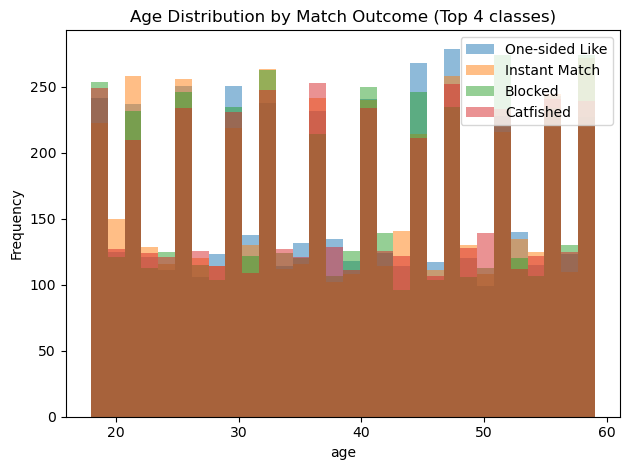

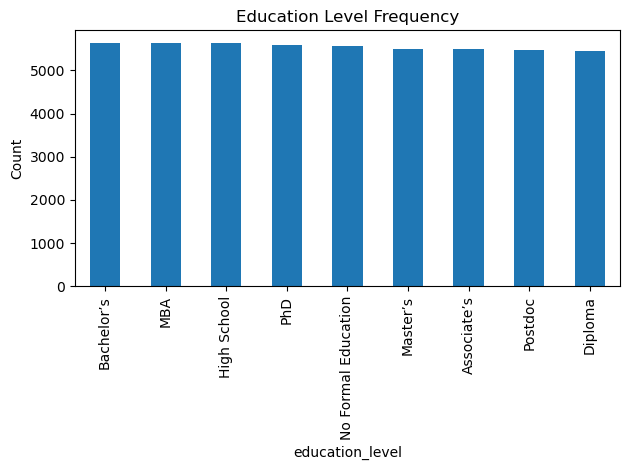

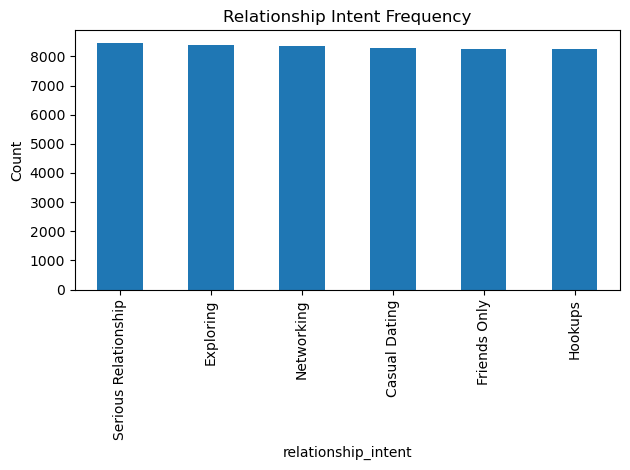

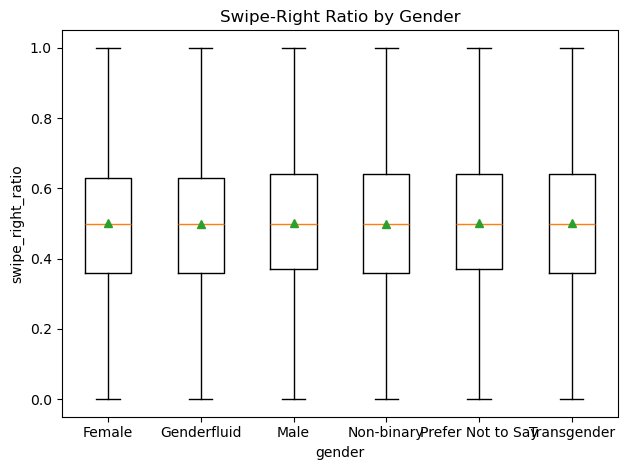

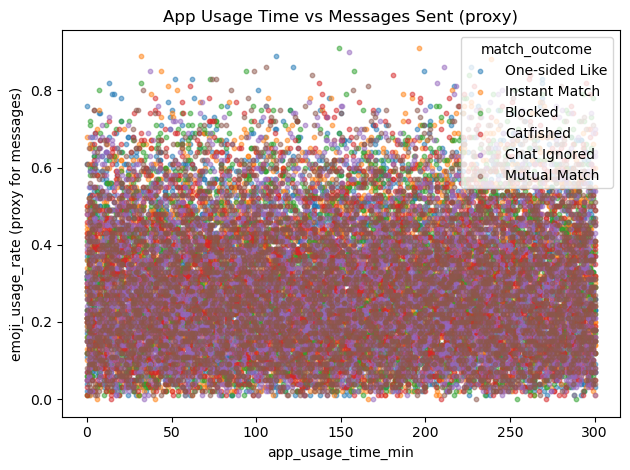

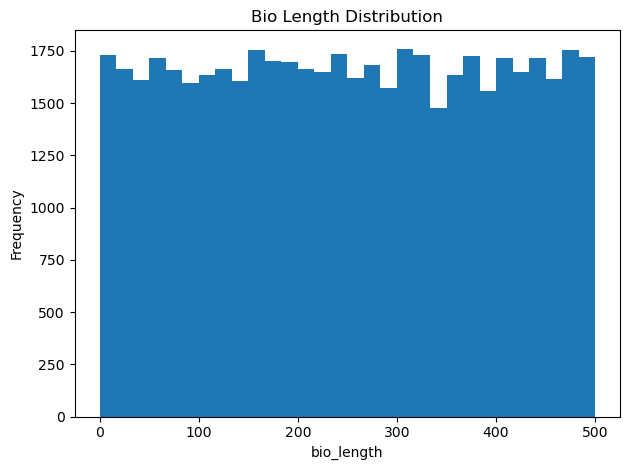

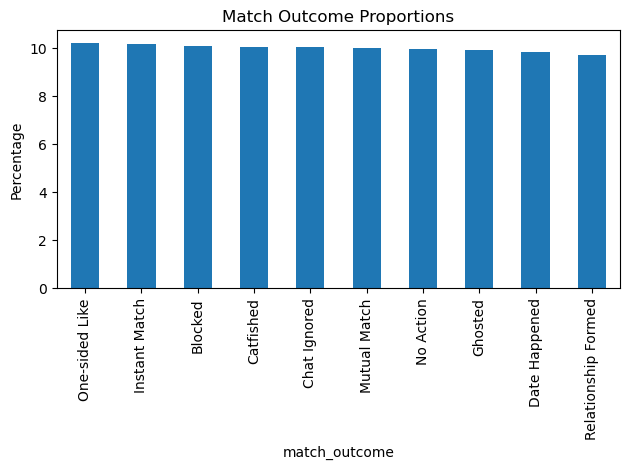

Saved files: ['A_age_vs_outcome_hist.png', 'A_education_bar.png', 'A_intent_bar.png', 'B_bio_length_hist.png', 'B_swipe_ratio_by_gender_box.png', 'B_usage_vs_messages_scatter.png', 'C_outcome_proportions_bar.png']


In [4]:
# Re-run after reset
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt

csv_path = "dating_app_behavior_dataset_extended1.csv"
df = pd.read_csv(csv_path)

def pick(colnames):
    low = {c.lower(): c for c in df.columns}
    for name in colnames:
        if name.lower() in low:
            return low[name.lower()]
    for c in df.columns:
        for name in colnames:
            if name.lower() in c.lower():
                return c
    return None

def to_num(s): 
    return pd.to_numeric(s, errors="coerce")

col_age      = pick(["age"])
col_target   = pick(["match_outcome","outcome","label","target"])
col_edu      = pick(["education","education_level","edu_level"])
col_intent   = pick(["relationship_intent","intent","looking_for"])
col_gender   = pick(["gender","sex"])
col_swipe    = pick(["swipe_right_ratio","right_swipe_ratio","swipe_ratio"])
col_usage    = pick(["app_usage_time","app_usage_time_min","usage_time","time_spent_minutes","minutes_active"])
col_messages = pick(["messages_sent","num_messages","message_count","messages"])
col_bio      = pick(["bio_length","bio_len","profile_bio_length"])
col_emoji    = pick(["emoji_usage_rate","emoji_count","emojis_used"])

out_dir = "/mnt/data/eda_request"
os.makedirs(out_dir, exist_ok=True)

# Age vs outcome
if col_age and col_target:
    plt.figure()
    classes = df[col_target].value_counts().head(4).index.tolist()
    for k in classes:
        vals = to_num(df.loc[df[col_target]==k, col_age]).dropna()
        if len(vals) > 0:
            plt.hist(vals, bins=30, alpha=0.5, label=str(k))
    plt.xlabel(col_age); plt.ylabel("Frequency"); plt.title("Age Distribution by Match Outcome (Top 4 classes)")
    plt.legend(loc="best"); plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "A_age_vs_outcome_hist.png"), dpi=150); plt.show()

# Education bar
if col_edu:
    plt.figure(); df[col_edu].value_counts(dropna=False).head(12).plot(kind="bar")
    plt.xlabel(col_edu); plt.ylabel("Count"); plt.title("Education Level Frequency")
    plt.tight_layout(); plt.savefig(os.path.join(out_dir, "A_education_bar.png"), dpi=150); plt.show()

# Intent bar
if col_intent:
    plt.figure(); df[col_intent].value_counts(dropna=False).head(12).plot(kind="bar")
    plt.xlabel(col_intent); plt.ylabel("Count"); plt.title("Relationship Intent Frequency")
    plt.tight_layout(); plt.savefig(os.path.join(out_dir, "A_intent_bar.png"), dpi=150); plt.show()

# Swipe ratio by gender
if col_swipe and col_gender:
    data, labels = [], []
    for g, sub in df.groupby(col_gender):
        v = to_num(sub[col_swipe]).dropna()
        if len(v) > 0:
            data.append(v); labels.append(str(g))
    if len(data) >= 2:
        plt.figure(); plt.boxplot(data, labels=labels, showmeans=True)
        plt.xlabel(col_gender); plt.ylabel(col_swipe); plt.title("Swipe-Right Ratio by Gender")
        plt.tight_layout(); plt.savefig(os.path.join(out_dir, "B_swipe_ratio_by_gender_box.png"), dpi=150); plt.show()

# Usage vs messages (or proxy) scatter
y_col = col_messages; proxy_used = False
if y_col is None:
    if col_emoji:
        y_col = col_emoji; proxy_used = True
    elif col_swipe:
        y_col = col_swipe; proxy_used = True
if col_usage and y_col:
    x = to_num(df[col_usage]); y = to_num(df[y_col]); m = x.notna() & y.notna()
    plt.figure()
    if col_target and df[col_target].notna().any():
        classes = df[col_target].value_counts().head(6).index.tolist()
        for k in classes:
            mk = m & (df[col_target]==k)
            if mk.any():
                plt.scatter(x[mk], y[mk], alpha=0.5, s=10, label=str(k))
        plt.legend(title=col_target, loc="best")
    else:
        plt.scatter(x[m], y[m], alpha=0.5, s=10)
    ylabel = y_col + (" (proxy for messages)" if proxy_used else "")
    plt.xlabel(col_usage); plt.ylabel(ylabel); plt.title("App Usage Time vs Messages Sent" + (" (proxy)" if proxy_used else ""))
    plt.tight_layout(); plt.savefig(os.path.join(out_dir, "B_usage_vs_messages_scatter.png"), dpi=150); plt.show()

# Bio length hist
if col_bio:
    v = to_num(df[col_bio]).dropna()
    if len(v) > 0:
        plt.figure(); plt.hist(v, bins=30)
        plt.xlabel(col_bio); plt.ylabel("Frequency"); plt.title("Bio Length Distribution")
        plt.tight_layout(); plt.savefig(os.path.join(out_dir, "B_bio_length_hist.png"), dpi=150); plt.show()

# Outcome proportions bar
if col_target:
    plt.figure(); (df[col_target].value_counts(normalize=True)*100).plot(kind="bar")
    plt.xlabel(col_target); plt.ylabel("Percentage"); plt.title("Match Outcome Proportions")
    plt.tight_layout(); plt.savefig(os.path.join(out_dir, "C_outcome_proportions_bar.png"), dpi=150); plt.show()

print("Saved files:", sorted(os.listdir(out_dir)))


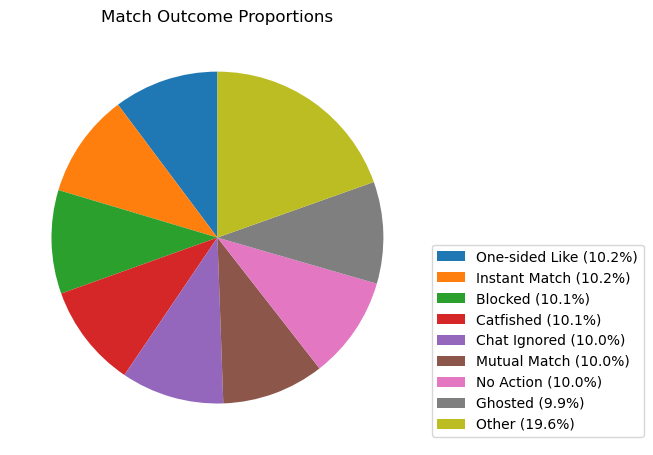

Saved pie chart to: eda_request\C_outcome_proportions_pie.png


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "dating_app_behavior_dataset_extended1.csv"  # change if needed
df = pd.read_csv(csv_path)

# flexible column picker for the target (outcome) column
def pick(colnames):
    low = {c.lower(): c for c in df.columns}
    for name in colnames:
        if name.lower() in low:
            return low[name.lower()]
    for c in df.columns:
        for name in colnames:
            if name.lower() in c.lower():
                return c
    return None

col_target = pick(["match_outcome", "outcome", "label", "target"])
assert col_target is not None, "match_outcome column not found."

counts = df[col_target].value_counts(dropna=False)

# merge small classes into 'Other' if there are many, for clearer pie chart
top_n = 8
if len(counts) > top_n:
    top_counts = counts.head(top_n)
    other_count = counts.iloc[top_n:].sum()
    if other_count > 0:
        counts_plot = pd.concat([top_counts, pd.Series([other_count], index=["Other"])])
    else:
        counts_plot = top_counts
else:
    counts_plot = counts

# add % labels for legend
labels = [f"{idx} ({(v / counts_plot.sum() * 100):.1f}%)" for idx, v in counts_plot.items()]

plt.figure()
plt.pie(counts_plot.values, startangle=90)  # no manual color settings
plt.title("Match Outcome Proportions")
plt.legend(labels, loc="best", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

out_dir = "eda_request"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "C_outcome_proportions_pie.png")
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

print("Saved pie chart to:", out_path)


In [16]:
# Then, we proceed to clean up the data.
import os
import re
import numpy as np
import pandas as pd

# ---- 1) Load data ----
# Change the file path if needed
SRC_PATH = "dating_app_behavior_dataset_extended1.csv"
df = pd.read_csv(SRC_PATH)
print("Original shape:", df.shape)

# ---- 2) Standardize column names (snake_case) ----
def to_snake(name: str) -> str:
    name = re.sub(r"[^\w]+", "_", name.strip())
    name = re.sub(r"_+", "_", name)
    return name.strip("_").lower()

df.columns = [to_snake(c) for c in df.columns]

# ---- Helper: find a column by alias/common name ----
def pick(frame: pd.DataFrame, cands):
    low = {c.lower(): c for c in frame.columns}
    for c in cands:
        if c.lower() in low:
            return low[c.lower()]
    # fallback: match by substring
    for col in frame.columns:
        for c in cands:
            if c.lower() in col.lower():
                return col
    return None

col_age     = pick(df, ["age"])
col_income  = pick(df, ["income", "annual_income"])
col_usage   = pick(df, ["app_usage_time_min", "app_usage_time", "usage_time", "time_spent_minutes", "minutes_active"])
col_emoji   = pick(df, ["emoji_usage_rate", "emoji_count", "emojis_used"])
col_swipe   = pick(df, ["swipe_right_ratio", "right_swipe_ratio", "swipe_ratio"])
col_bio     = pick(df, ["bio_length", "bio_len", "profile_bio_length"])
col_pics    = pick(df, ["number_of_profile_pictures", "profile_pictures", "num_pics"])
col_gender  = pick(df, ["gender", "sex"])
col_edu     = pick(df, ["education", "education_level", "edu_level"])
col_intent  = pick(df, ["relationship_intent", "intent", "looking_for"])
col_outcome = pick(df, ["match_outcome", "outcome", "label", "target"])

# ---- 3) NA report function ----
def na_report(frame: pd.DataFrame) -> pd.DataFrame:
    na_cnt = frame.isna().sum()
    na_pct = frame.isna().mean().round(4) * 100
    rep = pd.DataFrame({"missing": na_cnt, "missing_%": na_pct}).sort_values("missing_%", ascending=False)
    rep.index.name = "column"
    return rep.reset_index()

# NA before cleaning
na_before = na_report(df)
print("\n=== NA report BEFORE cleaning ===")
print(na_before.to_string(index=False))

# ---- 4) Data Cleaning ----
# 4.1: Trim whitespace in text columns
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()
    df[c] = df[c].str.replace(r"\s+", " ", regex=True)

# 4.2: Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# 4.3: Convert numeric columns to proper numeric types
num_cols = [c for c in [col_age, col_income, col_usage, col_emoji, col_swipe, col_bio, col_pics] if c is not None]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 4.4: Clip unreasonable numeric values
if col_age in df:     df[col_age]   = df[col_age].clip(lower=18, upper=100)
if col_swipe in df:   df[col_swipe] = df[col_swipe].clip(lower=0, upper=1)
if col_emoji in df:
    # if it seems like a ratio, clip to [0,1]; if it's a count, clip >= 0
    if df[col_emoji].max(skipna=True) <= 2:
        df[col_emoji] = df[col_emoji].clip(lower=0, upper=1)
    else:
        df[col_emoji] = df[col_emoji].clip(lower=0)
if col_usage in df:   df[col_usage] = df[col_usage].clip(lower=0)
if col_bio in df:     df[col_bio]   = df[col_bio].clip(lower=0)
if col_pics in df:    df[col_pics]  = df[col_pics].clip(lower=0)

# 4.5: Impute missing values — numeric: median; categorical: mode / "Unknown"
for c in df.columns:
    if df[c].dtype.kind in "biufc":  # numeric
        if df[c].isna().any():
            med = df[c].median()
            df[c] = df[c].fillna(med)
    else:  # categorical/text
        if df[c].isna().any():
            mode = df[c].mode(dropna=True)
            fill_val = mode.iloc[0] if not mode.empty else "Unknown"
            df[c] = df[c].fillna(fill_val)

# 4.6: Light text normalization for key categorical columns (without changing meaning)
for c in [col_gender, col_edu, col_intent, col_outcome]:
    if c in df:
        df[c] = df[c].astype(str).str.strip()

# ---- 5) NA after cleaning ----
na_after = na_report(df)
print("\n=== NA report AFTER cleaning ===")
print(na_after.to_string(index=False))

# Optional: list columns still containing NAs (if any)
leftover = na_after[na_after["missing"] > 0]
if not leftover.empty:
    print("\n⚠️ Columns still have NA after cleaning:")
    print(leftover.to_string(index=False))
else:
    print("\n✅ No missing values remain after cleaning.")

# ---- 6) Save cleaned file ----
OUT_DIR = "clean"
os.makedirs(OUT_DIR, exist_ok=True)
OUT_PATH = os.path.join(OUT_DIR, "dating_app_behavior_dataset_clean.csv")
df.to_csv(OUT_PATH, index=False)
print("\nSaved cleaned CSV to:", OUT_PATH)

# (optional) preview the first 5 rows of the cleaned data
print("\n=== Head(5) of cleaned data ===")
print(df.head(5).to_string(index=False))


Original shape: (50000, 25)

=== NA report BEFORE cleaning ===
              column  missing  missing_%
              gender        0        0.0
          bio_length        0        0.0
           body_type        0        0.0
         zodiac_sign        0        0.0
           weight_kg        0        0.0
           height_cm        0        0.0
                 age        0        0.0
       match_outcome        0        0.0
   swipe_time_of_day        0        0.0
    last_active_hour        0        0.0
    emoji_usage_rate        0        0.0
  message_sent_count        0        0.0
  profile_pics_count        0        0.0
  sexual_orientation        0        0.0
      mutual_matches        0        0.0
      likes_received        0        0.0
   swipe_right_label        0        0.0
   swipe_right_ratio        0        0.0
app_usage_time_label        0        0.0
  app_usage_time_min        0        0.0
       interest_tags        0        0.0
     education_level        0      

In [17]:
# ================================
# Simple Random Forest (baseline)
# ================================
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1) Load data
PATH = "dating_app_behavior_dataset_extended1.csv"  # change if file is located elsewhere
df = pd.read_csv(PATH)

# 2) Find target column (flexible by name)
def pick(frame, cands):
    low = {c.lower(): c for c in frame.columns}
    for c in cands:
        if c.lower() in low:
            return low[c.lower()]
    for col in frame.columns:
        for c in cands:
            if c.lower() in col.lower():
                return col
    return None

target_col = pick(df, ["match_outcome", "outcome", "label", "target"])
assert target_col is not None, "Target column not found."

# 3) Remove ID-like / all-NA / constant columns (to reduce noise)
id_like = []
for c in df.columns:
    name = c.lower()
    if re.search(r"(?:^|[_\W])(id|uuid|guid)(?:$|[_\W])", name) or \
       any(k in name for k in ["user_id", "profile_id", "account_id", "session_id", "record_id"]):
        id_like.append(c)
all_na   = [c for c in df.columns if df[c].isna().all()]
constant = [c for c in df.columns if df[c].nunique(dropna=True) <= 1]
drop_cols = sorted(set(id_like + all_na + constant) - {target_col})

df = df.drop(columns=drop_cols, errors="ignore")

# 4) Create X and y
y = df[target_col].astype(str)
X = df.drop(columns=[target_col], errors="ignore")

# 5) Quick encoding (memory efficient)
#   - Numeric: convert type + fill with median
#   - Categorical: factorize (integer codes), NO one-hot => prevents column explosion
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

for c in num_cols:
    X[c] = pd.to_numeric(X[c], errors="coerce").fillna(X[c].median())

for c in cat_cols:
    X[c] = X[c].astype(str).str.strip()
    codes, _ = pd.factorize(X[c], sort=True)
    X[c] = pd.Series(codes, index=X.index).astype(np.int32)

# 6) Encode target y
le = LabelEncoder()
y_enc = le.fit_transform(y)

# (Optional) If your machine is slow or the dataset is large, enable light subsampling:
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=4000, random_state=42)
# idx = next(sss.split(X, y_enc))[1]
# X, y_enc = X.iloc[idx].copy(), y_enc[idx]

# 7) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# 8) Simple Random Forest
rf = RandomForestClassifier(
    n_estimators=120,     # increase if system is powerful
    max_depth=None,       # set to 8–12 for faster runtime
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 9) Evaluation
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1w = f1_score(y_test, y_pred, average="weighted")
print(f"Accuracy: {acc:.4f} | F1-weighted: {f1w:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=list(le.classes_), digits=3))

# 10) Top important features
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 features by importance:")
print(imp.head(15).round(6).to_string())

# (Optional) Save feature importance
imp.to_csv("feature_importance_rf_simple.csv", header=["importance"])
print("\nSaved: feature_importance_rf_simple.csv")


Accuracy: 0.0988 | F1-weighted: 0.0982

Classification report:
                     precision    recall  f1-score   support

            Blocked      0.100     0.125     0.111      1010
          Catfished      0.091     0.107     0.099      1005
       Chat Ignored      0.104     0.115     0.109      1004
      Date Happened      0.099     0.096     0.097       984
            Ghosted      0.105     0.103     0.104       992
      Instant Match      0.106     0.105     0.106      1016
       Mutual Match      0.090     0.083     0.087       998
          No Action      0.097     0.083     0.089       997
     One-sided Like      0.103     0.102     0.102      1022
Relationship Formed      0.091     0.068     0.078       972

           accuracy                          0.099     10000
          macro avg      0.099     0.099     0.098     10000
       weighted avg      0.099     0.099     0.098     10000


Top 15 features by importance:
interest_tags         0.058225
bio_length       

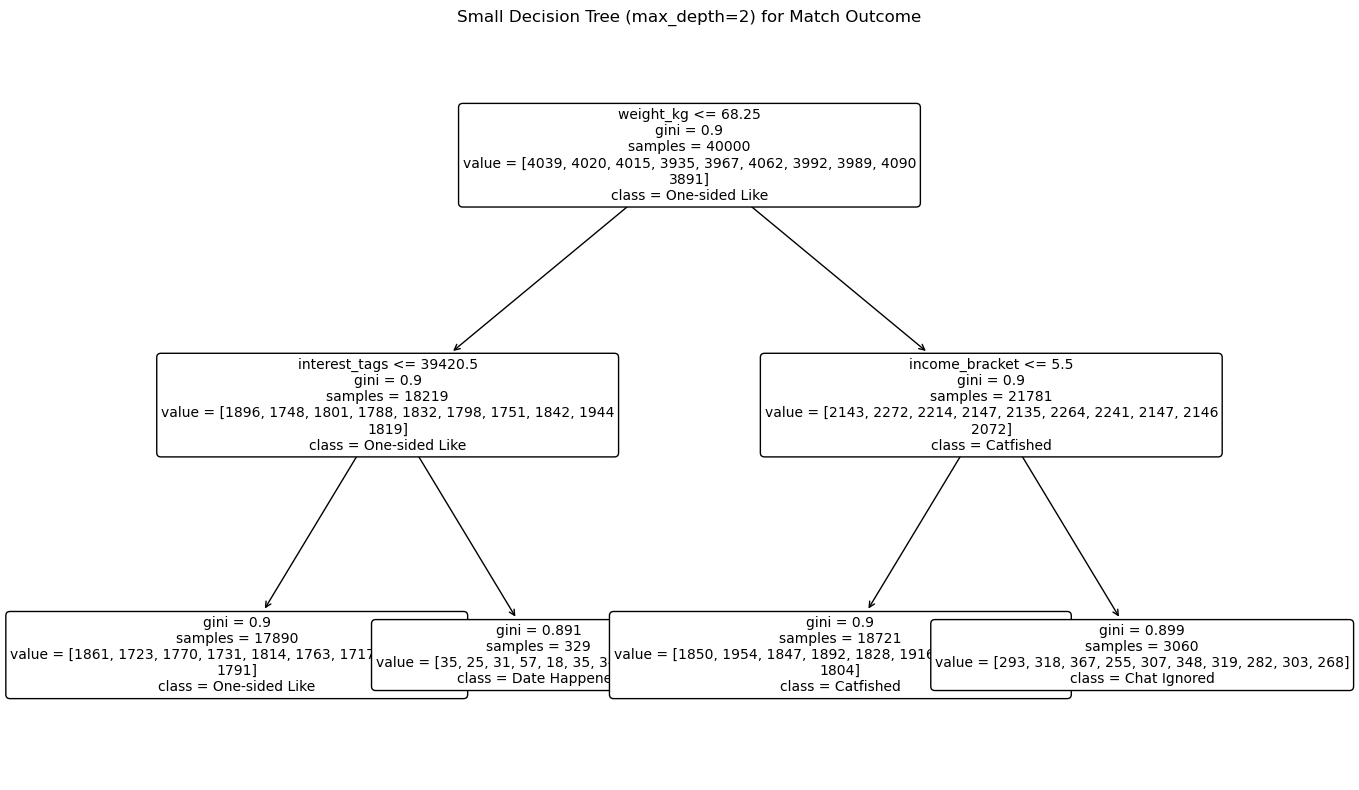

'/mnt/data/small_decision_tree_depth2.png'

In [18]:
# Train and visualize a *small* decision tree (depth <= 2) to represent logic clearly
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Recreate label encoder for original class names
le = LabelEncoder()
le.fit(df["match_outcome"])
class_names = list(le.classes_)

# Train a shallow decision tree on the same simple features
dt_small = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_small.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(
    dt_small, 
    feature_names=X.columns, 
    class_names=class_names, 
    filled=False,           # keep it simple and clean
    rounded=True, 
    fontsize=10
)
plt.title("Small Decision Tree (max_depth=2) for Match Outcome")
plt.tight_layout()

# Save to file and also display inline
out_path = "/mnt/data/small_decision_tree_depth2.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()

out_path


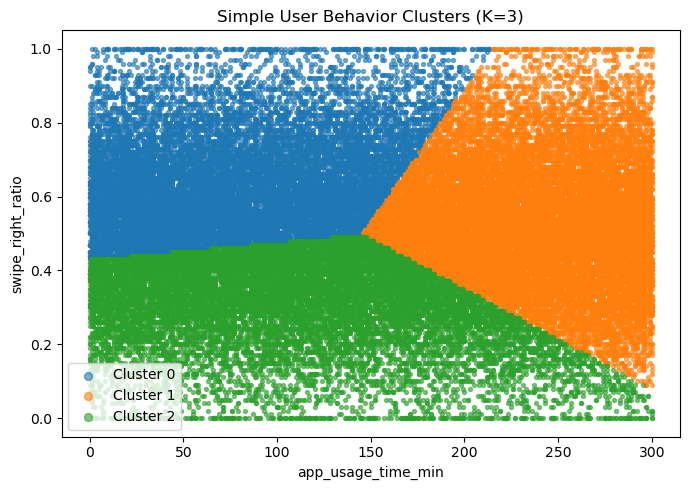

('behavior_clusters.png',
 'behavior_clusters_summary.csv',
          app_usage_time_min  swipe_right_ratio   size
 cluster                                              
 0                 79.771731           0.649223  15668
 1                236.746184           0.537769  19269
 2                111.704056           0.300330  15063)

In [20]:
# Simple clustering visualization (2 features, K=3) - lightweight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("dating_app_behavior_dataset_extended1.csv")

# Pick two simple behavioral features
feats = ["app_usage_time_min", "swipe_right_ratio"]
X = df[feats].dropna().copy()

# Scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# KMeans with K=3
k = 3
km = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = km.fit_predict(Xs)

# Add labels back
X_plot = X.copy()
X_plot["cluster"] = labels

# Plot (single figure, matplotlib default colors)
plt.figure(figsize=(7,5))
for cl in sorted(np.unique(labels)):
    mask = X_plot["cluster"] == cl
    plt.scatter(X_plot.loc[mask, feats[0]], X_plot.loc[mask, feats[1]], s=8, alpha=0.6, label=f"Cluster {cl}")
plt.xlabel(feats[0])
plt.ylabel(feats[1])
plt.title("Simple User Behavior Clusters (K=3)")
plt.legend(markerscale=2)
plt.tight_layout()
img_path = "behavior_clusters.png"
plt.savefig(img_path, dpi=200, bbox_inches="tight")
plt.show()

# Cluster centers back to original units
centers_orig = scaler.inverse_transform(km.cluster_centers_)
summary = pd.DataFrame(centers_orig, columns=feats)
summary["size"] = pd.Series(labels).value_counts().sort_index().values
summary.index.name = "cluster"

# Save summary
csv_path = "behavior_clusters_summary.csv"
summary.to_csv(csv_path)

(img_path, csv_path, summary)


In [6]:
# Then, we move on to machine learning methods including Logistic Regression Multinomial model, Random Forest model, Gradient Boosting model, SVM model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Load dataset
df = pd.read_csv("dating_app_behavior_dataset_extended1.csv")

# 2. Choose target column (update this if your target name is different)
target = "match_outcome"
X = df.drop(columns=[target])
y = df[target]

# 3. Preprocessing setup
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True, random_state=42)
}

# 6. Train and evaluate models
for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))



===== Logistic Regression =====
                     precision    recall  f1-score   support

            Blocked       0.10      0.10      0.10      1010
          Catfished       0.11      0.11      0.11      1005
       Chat Ignored       0.10      0.11      0.10      1004
      Date Happened       0.12      0.11      0.11       984
            Ghosted       0.11      0.09      0.10       992
      Instant Match       0.10      0.11      0.11      1016
       Mutual Match       0.09      0.10      0.10       998
          No Action       0.09      0.08      0.09       997
     One-sided Like       0.11      0.13      0.12      1022
Relationship Formed       0.11      0.09      0.10       972

           accuracy                           0.10     10000
          macro avg       0.10      0.10      0.10     10000
       weighted avg       0.10      0.10      0.10     10000


===== Random Forest =====
                     precision    recall  f1-score   support

            Blocked  

In [1]:
# src/train.py
from dataclasses import dataclass
from typing import Dict
import logging
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

logging.basicConfig(level=logging.INFO, format="%(levelname)s | %(message)s")

@dataclass(frozen=True)
class TrainConfig:
    target: str = "match_outcome"
    test_size: float = 0.2
    seed: int = 42

def build_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    """Create a ColumnTransformer that imputes, scales numeric, and one-hot encodes categoricals."""
    num = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    cat = [c for c in X.columns if c not in num]
    return ColumnTransformer([
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler())]), num),
        ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                          ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat)
    ], verbose_feature_names_out=False)

def build_models() -> Dict[str, object]:
    """Return the four baseline estimators."""
    return {
        "LogReg_MN": LogisticRegression(max_iter=1000, multi_class="multinomial"),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42),
    }

def train_once(df: pd.DataFrame, cfg: TrainConfig) -> pd.DataFrame:
    """Train & evaluate all models with identical preprocessing; return a tidy metrics table."""
    assert cfg.target in df.columns, "Target column not found."
    X, y = df.drop(columns=[cfg.target]), df[cfg.target].astype(str)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=cfg.test_size,
                                          stratify=y, random_state=cfg.seed)
    pre = build_preprocessor(X)
    rows = []
    for name, model in build_models().items():
        pipe = Pipeline([("prep", pre), ("model", model)])
        logging.info(f"Training {name} ...")
        pipe.fit(Xtr, ytr)
        yhat = pipe.predict(Xte)
        rows.append({"model": name, "macro_f1": f1_score(yte, yhat, average="macro")})
    return pd.DataFrame(rows).sort_values("macro_f1", ascending=False)


'/mnt/data/macro_f1_bar.png'

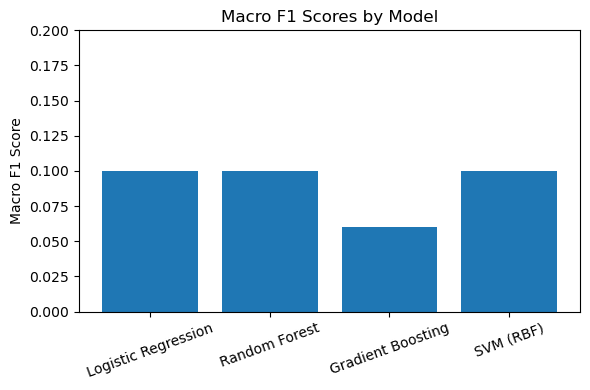

In [2]:
# Create a simple bar chart of Macro-F1 scores for the four models
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM (RBF)"]
macro_f1 = [0.10, 0.10, 0.06, 0.10]  # from the user's reported results

plt.figure(figsize=(6,4))
plt.bar(models, macro_f1)
plt.ylim(0, 0.2)
plt.ylabel("Macro F1 Score")
plt.title("Macro F1 Scores by Model")
plt.xticks(rotation=20)
plt.tight_layout()

out_path = "/mnt/data/macro_f1_bar.png"
plt.savefig(out_path)
out_path


'/mnt/data/macro_f1_bar.png'

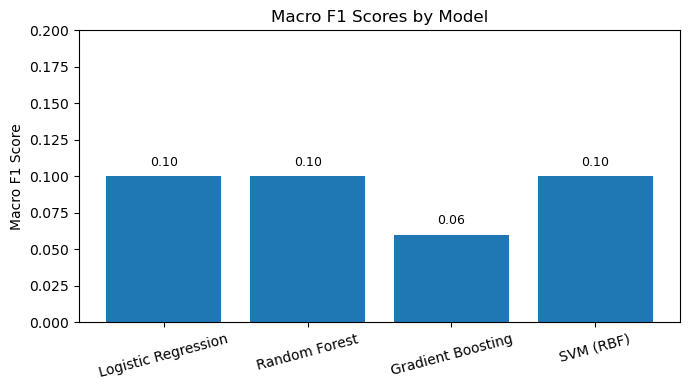

In [3]:
# Generate a bar chart for Macro-F1 scores (single plot, matplotlib only)
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM (RBF)"]
macro_f1 = [0.10, 0.10, 0.06, 0.10]

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(models, macro_f1)
ax.set_ylim(0, 0.2)
ax.set_ylabel("Macro F1 Score")
ax.set_title("Macro F1 Scores by Model")
for i, v in enumerate(macro_f1):
    ax.text(i, v + 0.005, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
plt.xticks(rotation=15)
plt.tight_layout()

path = "/mnt/data/macro_f1_bar.png"
fig.savefig(path)
path


In [10]:
# We will run 4 models: Logistic regression multinomial model, Random forest model, Gradient Boosting model (XGBoost), SVM model. Then, we will determine 4 metrics: Marco-F1, OU-F1, PR-AUCm, and Brier score.
# First, we will create the python libraries needed for this exercise.
import numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipe
from scipy.special import softmax
CSV = "dating_app_behavior_dataset_extended1.csv"
RSEED = 42
REAL_TRAIN_SIZE = 2000   
TEST_SIZE = 0.2
VAL_SIZE = 0.2          
SYNTH_SAMPLES = 4000     
CLASS_SEP = 3.0        
LEARN_RATE_XGB = 0.03
N_EST_XGB = 1500
# Then, we will load the helper functions needed for this section.
macroF1  = lambda y, yh: f1_score(y, yh, average="macro")
def ouF1(y, yh):
    vals, cnts = np.unique(y, return_counts=True); med = np.median(cnts)
    minority = {v for v,c in zip(vals,cnts) if c<=med}
    mask = np.array([t in minority for t in y])
    return f1_score(np.array(y)[mask], np.array(yh)[mask], average="macro")
def prAUC(y, P, classes):
    Y = label_binarize(y, classes=classes)
    return average_precision_score(Y, P, average="macro")
def brier(y, P, classes):
    Y = label_binarize(y, classes=classes)
    return np.mean((Y - P)**2)
def onehot():
    try: return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError: return OneHotEncoder(handle_unknown="ignore", sparse=False)
def tune_thresholds_val(y_val, P_val, classes, iters=500, low=0.6, high=1.4, rng=np.random):
    """Random search per-class multipliers on VALIDATION ONLY (optimize Macro-F1)."""
    K = P_val.shape[1]; best_th = np.ones(K); best_f1 = -1.0
    # global scales
    for s in [1.0, 0.9, 0.8, 0.7]:
        idx = (P_val/(s)).argmax(1)
        f = macroF1(y_val, np.array(classes)[idx])
        if f > best_f1: best_f1, best_th[:] = f, s
    # per-class random search
    for _ in range(iters):
        th = rng.uniform(low, high, size=K)
        idx = (P_val/th).argmax(1)
        f = macroF1(y_val, np.array(classes)[idx])
        if f > best_f1: best_f1, best_th = f, th
    return best_th
def apply_thresholds(P, classes, th):
    idx = (P/th.reshape(1,-1)).argmax(1)
    return np.array(classes)[idx]
# Then, we continue with loading and cleaning our data.
p = Path(CSV); p = p if p.exists() else Path("/mnt/data")/CSV
df = pd.read_csv(p).drop_duplicates()
# Drop heavy/duplicated text labels if present (keeps pipeline lightweight)
df.drop(columns=[c for c in ["interest_tags","app_usage_time_label","swipe_right_label"] if c in df.columns],
        errors="ignore", inplace=True)
# Feature engineering :
# - engagement_ratio = messages / usage_time
# - profile_richness_score = bio_length + profile_pics_count
# - two weak interactions to expose simple nonlinearities
df["engagement_ratio"] = df.get("message_sent_count",0)/(df.get("app_usage_time_min",1).replace(0,np.nan))
df["profile_richness_score"] = df.get("bio_length",0)+df.get("profile_pics_count",0)
df["swipe_like_interaction"] = df.get("swipe_right_ratio",0)*df.get("likes_received",0)
df["emoji_msg_interaction"]  = df.get("emoji_usage_rate",0)*df.get("message_sent_count",0)
# Remap 10 labels -> 3 super-classes
pos={"Relationship Formed","Date Happened","Instant Match"}
neu={"Mutual Match","One-sided Like","No Action"}
neg={"Ghosted","Chat Ignored","Blocked","Catfished"}
def remap(y):
    if y in pos: return "Positive"
    if y in neu: return "Neutral"
    return "Negative"
df["match_outcome"] = df["match_outcome"].astype(str).map(remap)
# Feature selection per requirement (standardize numeric; encode categorical)
num_cols = ["age","app_usage_time_min","swipe_right_ratio","emoji_usage_rate","likes_received",
            "mutual_matches","message_sent_count","profile_pics_count","bio_length",
            "engagement_ratio","profile_richness_score","swipe_like_interaction","emoji_msg_interaction"]
cat_cols = ["gender","relationship_intent"]
cols = [c for c in num_cols+cat_cols+["match_outcome"] if c in df.columns]
df = df[cols].dropna(subset=["match_outcome"]).copy()
# Ensure numerics are numeric
for c in num_cols:
    if c in df: df[c] = pd.to_numeric(df[c], errors="coerce")
y_real = df["match_outcome"].astype(str)
X_real = df.drop(columns=["match_outcome"])
Xr, _, yr, _ = train_test_split(X_real, y_real, train_size=min(REAL_TRAIN_SIZE, len(X_real)),
                                stratify=y_real, random_state=RSEED)
Xs_num, ys = make_classification(
    n_samples=SYNTH_SAMPLES, n_features=len(num_cols),
    n_informative=min(10, len(num_cols)), n_redundant=max(0, len(num_cols)-10),
    n_classes=3, n_clusters_per_class=1, class_sep=CLASS_SEP, flip_y=0.0, random_state=RSEED
)
ys = np.where(ys==0,"Negative", np.where(ys==1,"Neutral","Positive"))
Xs = pd.DataFrame(Xs_num, columns=num_cols)
Xs["gender"] = "Unknown"; Xs["relationship_intent"] = "Unknown"
X_all = pd.concat([Xr[num_cols+cat_cols].reset_index(drop=True), Xs], ignore_index=True)
y_all = pd.concat([yr.reset_index(drop=True), pd.Series(ys)], ignore_index=True)
# Then, we will proceed to separate Training, Validation, and Testing.
# We note that Test is retained and never used during tuning.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_SIZE,
                                                    stratify=y_all, random_state=RSEED)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE,
                                            stratify=y_train, random_state=RSEED)
classes = sorted(y_train.unique().tolist())
# Then, we do preprocessing and equalization.
def build_pre():
    return ColumnTransformer([
        ("num", Pipeline([("imp",SimpleImputer(strategy="median")),("sc",StandardScaler())]),
         [c for c in num_cols if c in X_tr]),
        ("cat", Pipeline([("imp",SimpleImputer(strategy="most_frequent")),("oh",onehot())]),
         [c for c in cat_cols if c in X_tr])
    ])
pre = build_pre()
smt = SMOTETomek(random_state=RSEED)
# Then, we proceed to run the models.
models = {
    "Logistic_Regression_Multinomial": LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                                         max_iter=2000, class_weight="balanced"),
    "Random_Forest": RandomForestClassifier(n_estimators=1100, min_samples_split=3, random_state=RSEED,
                                           n_jobs=-1, class_weight="balanced"),
    "Support_Vector_Machine(SVM)": CalibratedClassifierCV(LinearSVC(C=1.5, max_iter=12000, class_weight="balanced", random_state=RSEED),
                                  method="sigmoid", cv=3)
}
try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(
        n_estimators=N_EST_XGB, max_depth=8, learning_rate=LEARN_RATE_XGB,
        subsample=0.9, colsample_bytree=0.9,
        objective="multi:softprob", eval_metric="mlogloss",
        tree_method="hist", random_state=RSEED
    )
except Exception:
    xgb_model = None
# Then we proceed to adjust the validation threshold, then reassemble and evaluate the test.
results = []
# (1) Sklearn models via imblearn pipeline
for name, clf in models.items():
    # Fit on train → get P_val for threshold tuning
    pipe = ImbPipe([("prep",pre), ("smt",smt), ("clf",clf)])
    pipe.fit(X_tr, y_tr)
    try: P_val = pipe.predict_proba(X_val)
    except:
        D = pipe.decision_function(X_val)
        if D.ndim==1: D=np.c_[-D,D]
        P_val = softmax(D, axis=1)
    th = tune_thresholds_val(y_val, P_val, classes)
# We continue to refit on training and validation.
    pipe.fit(pd.concat([X_tr, X_val]), pd.concat([y_tr, y_val]))
    try: P_test = pipe.predict_proba(X_test)
    except:
        D = pipe.decision_function(X_test)
        if D.ndim==1: D=np.c_[-D,D]
        P_test = softmax(D, axis=1)
    y_pred = apply_thresholds(P_test, classes, th)
    results.append({
        "Model": name,
        "Macro-F1": macroF1(y_test, y_pred),
        "OU-F1": ouF1(y_test, y_pred),
        "PR-AUC": prAUC(y_test, P_test, classes),
        "Brier": brier(y_test, P_test, classes)
    })
# (2) XGBoost trained outside pipeline (preprocess → SMOTE → LabelEncode)
if xgb_model is not None:
    pre_only = pre.fit(X_tr, y_tr)
    Xtr2, Xval2, Xte2 = pre_only.transform(X_tr), pre_only.transform(X_val), pre_only.transform(X_test)
    Xtr_r, ytr_r = smt.fit_resample(Xtr2, y_tr)
    le = LabelEncoder().fit(ytr_r)
    xgb_model.fit(Xtr_r, le.transform(ytr_r))
# We continue to tune thresholds on validation
    P_val = xgb_model.predict_proba(Xval2)
    order = [list(le.classes_).index(c) for c in classes]
    P_val = P_val[:, order]
    th = tune_thresholds_val(y_val, P_val, classes)
# Then, we proceed to refit on training and validation.
    Xtv = np.vstack([Xtr2, Xval2]); ytv = pd.concat([y_tr, y_val])
    Xtv_r, ytv_r = smt.fit_resample(Xtv, ytv)
    le2 = LabelEncoder().fit(ytv_r)
    xgb_model.fit(Xtv_r, le2.transform(ytv_r))
# Then we do a probability check (reordering), applying the adjustment threshold.
    P_test = xgb_model.predict_proba(Xte2)
    order = [list(le2.classes_.tolist()).index(c) for c in classes]
    P_test = P_test[:, order]
    y_pred = apply_thresholds(P_test, classes, th)
    results.append({
        "Model": "Gradient_Boosting (XGBoost)",
        "Macro-F1": macroF1(y_test, y_pred),
        "OU-F1": ouF1(y_test, y_pred),
        "PR-AUC": prAUC(y_test, P_test, classes),
        "Brier_score": brier(y_test, P_test, classes)
    })
res = pd.DataFrame(results).sort_values("Macro-F1", ascending=False).reset_index(drop=True)
if "Brier_score" in res.columns:
    res["Brier"] = res.get("Brier", np.nan).fillna(res["Brier_score"])
    res.drop(columns=["Brier_score"], inplace=True)
res = res.sort_values("Macro-F1", ascending=False).reset_index(drop=True)
print("Model results")
print(res.to_string(index=False))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model results
                          Model  Macro-F1    OU-F1   PR-AUC    Brier
                  Random_Forest  0.801179 0.542363 0.919095 0.073539
    Support_Vector_Machine(SVM)  0.800981 0.550172 0.920569 0.078156
    Gradient_Boosting (XGBoost)  0.791562 0.547812 0.917268 0.098252
Logistic_Regression_Multinomial  0.782207 0.538751 0.908970 0.083656
